# DAY 2: Models - Exercise 2.
In this excersice we will be: <br>
1. Using measures from Exercise 1 to charecterise the ECMWF model climatology.
2. Calculate the mean and terciles of the model climatology for OND, Kenya
3. Calculate the model bias relative to CHRIPS observations
4. Calculate the ensemble mean prediction for each year
5. Calculate the correlation of the ensemble mean predictions with CHIRPS observations.<br>

The data for this excersise is below - it looks a little more complicated than last time! <br>
However, it is the same principle. For each year, and each ensemble member <br>
a forecasted amount of rainfall is given for the months OND. 

In [48]:
import numpy as np
import xarray as xr
from Data import location
da = location('Kenya_Hindcast')
obs = location('Kenya_Obs_Chirps')
# Example: access rainfall for year=1994, member='Member 2'

print("Rainfall for 1996, Member 14:", da.sel(year=1996, member="Member 14").item())
print("Rainfall for 1996, Observed", obs[4])

Rainfall for 1996, Member 14: 3.26
Rainfall for 1996, Observed 5.85


## Climate Mean 
Like before we will start with figuring out the climate mean. <br>
The data is from the source ECMWF. <br>
So the climate mean is representative of the forecasted rainfall in OND over Kenya.

In [49]:
#Like before we calculate the mean. 
#It is slightly diffrent to last time. 
ECMWF_Climate_Mean =  da.mean().item()
print("Climate_Mean = ",ECMWF_Climate_Mean, "mm/day")

Climate_Mean =  2.7347777777777775 mm/day


## Observed rainfall
Now we must bring in the oberserved rain fall for OND <br>
This array applies to each year.


In [50]:
Obs_Rain =  [1.52,2.93,1.95,1.51,5.56,1.33,2.04,2.34,1.99,2.95,1.90,2.40,1.15,4.31,1.83,1.98,2.65,1.55,3.86,2.72,2.25,2.31,3.13,1.70]
Date_for_Obs = [1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
#So for the year 1993, there was 1.52 mm/day of rainfall in OND

In [51]:
Obs_Rain = obs

Now we need the mean for the Observed rainfall <br>
replace the inside of the bracket with the correct variable. <br>
Hint - See Ex 1 for np.mean if stuck

In [52]:
Obs_Mean = np.mean(Obs_Rain)
#Obs_Mean = np.mean()
print("The Observed Climate Mean =", Obs_Mean, "mm/day")

The Observed Climate Mean = 2.388333333333333 mm/day


## Bias Correction
The next step is to calculate the bias <br>
To do this we need to subtract the Observed Climate mean from the ECMWF Climate Mean. <br>
This is to say the forecast system is biased by a certain amount on average to the observed data.<br>
**Fill in the correct brackets with these options: ECMWF_Climate_Mean, Obs_Mean.**


In [53]:
Bias = (ECMWF_Climate_Mean) - (Obs_Mean)
#Bias = () - ()

print("This is the Bias:", Bias)

This is the Bias: 0.34644444444444433


## Terciles
Next we calculate the terciles!<br>
We did this in Ex 1. <br>
**Fill in the appropriate spot inside the brackets with : da** <br>
**Hint: This is the same spot RFA was in Ex 1**


In [54]:
RF_upper = np.percentile(da, 66.66666)
RF_lower = np.percentile(da, 33.33333)
#RF_upper = np.percentile( , 66.66666)
#RF_lower = np.percentile( , 33.33333)

print("The upper tercile determinor is:", RF_upper)
print("This lower tercile determinor is:", RF_lower)

The upper tercile determinor is: 2.94
This lower tercile determinor is: 2.2066665469999998


## Mean per year
Now we need to create a dataset that has the forecast mean for each year. <br>
For each year there is 15 predictions of the daily average rainfall for OND from ECMWF. <br>
So for each year we need to add up the 15 predictions and divide by 15. <br>
To do this we will rely on some python shortcuts.

In [55]:
#First we create an empty array to store the data in
Yearly_Forecast_mean = []

#Then we need to select for each year all the values accosiated with it
for year in da.year.values:
    data = da.sel(year=year)
    #now we can use the function mean to return the yearly mean across the members 
    mean = data.mean().item()
    #Now we can store them into the list
    Yearly_Forecast_mean.append(mean)
    #print(f"{year}: {round(mean, 2)}")

#Finally we round the values in the list for easy readability 
Yearly_Forecast_mean = np.round(Yearly_Forecast_mean,2)
print("Yearly_Forecast_mean for 1993-2016:",Yearly_Forecast_mean)

    

Yearly_Forecast_mean for 1993-2016: [2.42 4.3  2.4  1.83 4.84 2.14 2.13 2.23 2.28 2.78 2.55 2.74 2.13 3.83
 2.47 2.12 2.74 2.33 3.37 3.02 2.   2.67 4.07 2.26]


## Standard Deviation
Like in Ex1, we now need to caculate the standard deviation of the yearly forecast means' <br>
**Fill in the appropriate variable in the bracket and std after the "np."**

In [56]:
Standard_deviation = np.std(Yearly_Forecast_mean, ddof=1)
#Standard_deviation = np.( , ddof=1)

print("This is the standard deviation:", Standard_deviation)

This is the standard deviation: 0.7896998833715891


## Correlation Coeffecient 
Next up is to find the value for the Correlation Coeffecient.<br>
This is a measure of how close a set of values is to another set. <br>
We need to see how close the observed rainfall each year is to the forecasted mean of that year. <br>
This tells us if the forecast is generally predicting close to the correct rainfall. <br>
In practice we need to compare the Yearly_Forecast_mean dataset and the Obs_Rain dataset.<br>
The closer the Correlation_Coeffecient is to 1 - the better the forecasts' skill.<br>
<br>
**Put the correct variables inside the bracket, seperated by the comma.**

In [57]:
Correlation_Coeffecient = np.corrcoef(Yearly_Forecast_mean,Obs_Rain)[0,1]
#Correlation_Coeffecient = np.corrcoef( , )[0,1]
print("The Correlation_Coeffecient is:", Correlation_Coeffecient)

The Correlation_Coeffecient is: 0.8803196160718006


## Plotting
We can now assemble a plot. <br>
We want to compare the Yearly Forecast Mean - as this was the given forecast for rainfall per day in OND - Kenya. <br>
With the yearly Observed Rainfall per day in OND - Kenya. <br>
This is the Yearly_Forecast_mean dataset and the Obs_Rain dataset. <br>
The plot will show the years on the x-axis against the average mm of rainfall per day in OND on the y-axis. <br>
<br>
If the forecast was 100% correct then the two plotted lines would match up perfectly. <br>
The further appart the lines - the more the forecast was out. 


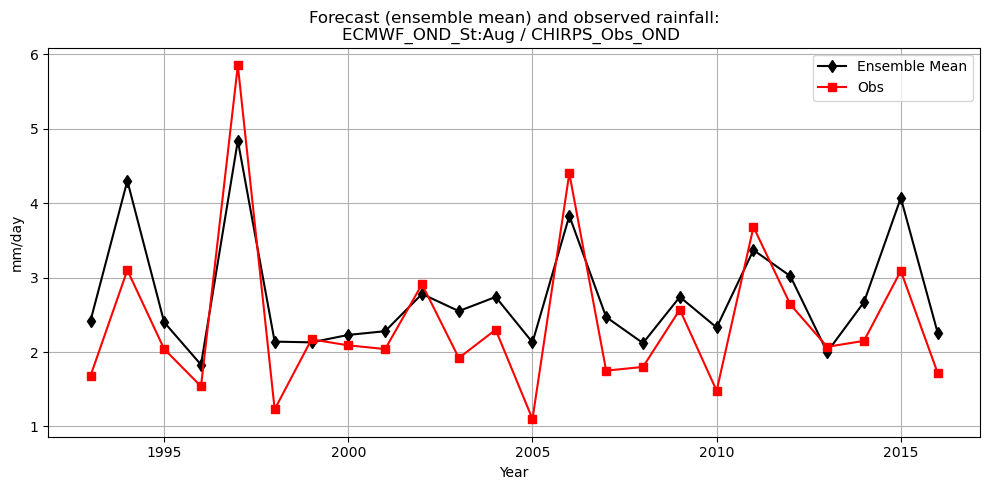

In [58]:
import matplotlib.pyplot as plt


years = list(range(1993, 2017))
mean_forecast_rainfall = Yearly_Forecast_mean
mean_observed_rainfall = Obs_Rain

plt.figure(figsize=(10, 5))

# Plot forecast rainfall
plt.plot(
    years,
    mean_forecast_rainfall,
    linestyle='-',
    marker='d',
    color='black',
    label='Ensemble Mean'
)

# Plot observed rainfall
plt.plot(
    years,
    mean_observed_rainfall,
    linestyle='-',
    marker='s',
    color='red',
    label='Obs'
)

# Labels and title
plt.xlabel('Year')
plt.ylabel('mm/day')
plt.title(
    'Forecast (ensemble mean) and observed rainfall:\n'
    'ECMWF_OND_St:Aug / CHIRPS_Obs_OND '
) #/ Reg. Kenya: \n''6N-5S;33-42E Bias=0.33/Corr=0.85'

# Legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# You have now finished EX 2; Please refer to the powerpoint on what to do next. 
## Copy the image of the plot into the powerpoint 